### Import libraries

import nltk
import pandas as pd
import string
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from wordcloud import WordCloud
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('Toner_updatedDis.csv')
df

,tag,patterns,responses
0,Hardware_New_Toner,"""My printer is not capable of printing documents""","""Ok ,You want to order new toner or lnk ,What ..."
1,Hardware_New_Toner,"""My printer does not print papers""","""Ok ,You want to order new toner or lnk ,What ..."
2,Hardware_New_Toner,"""I think the lnk is empty""","""Ok ,You want to order new toner or lnk ,What ..."
3,Hardware_New_Toner,"""I believe the lnk is empty""","""Ok ,You want to order new toner or lnk ,What ..."
4,Hardware_New_Toner,"""The lnk appears to be empty""","""Ok ,You want to order new toner or lnk ,What ..."
...,...,...,...
273,"""contact_information2""","""badge""","""your email id please"""
274,"""contact information3""","""em""","""ok now i need some information about your loc..."
275,"""location1""","""building""","""ok, the floor number?"""
276,"""location2""","""floor""","""room number?"""


In [3]:
len(df)

278

In [4]:
df.shape

(278, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        278 non-null    object
 1   patterns   278 non-null    object
 2   responses  278 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


In [6]:
df.isna().sum()

tag          0
patterns     0
responses    0
dtype: int64

# Preprocessing

stop words

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = set(stopwords.words('english'))
 
df['tag1'] = df['tag'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['patterns1'] = df['patterns'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['responses1'] = df['responses'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Drop old columns
df.drop(columns=['tag' , 'patterns', 'responses'], axis=1, inplace = True)
df

,tag1,patterns1,responses1
0,Hardware_New_Toner,"""My printer capable printing documents""","""Ok ,You want order new toner lnk ,What kind c..."
1,Hardware_New_Toner,"""My printer print papers""","""Ok ,You want order new toner lnk ,What kind c..."
2,Hardware_New_Toner,"""I think lnk empty""","""Ok ,You want order new toner lnk ,What kind c..."
3,Hardware_New_Toner,"""I believe lnk empty""","""Ok ,You want order new toner lnk ,What kind c..."
4,Hardware_New_Toner,"""The lnk appears empty""","""Ok ,You want order new toner lnk ,What kind c..."
...,...,...,...
273,"""contact_information2""","""badge""","""your email id please"""
274,"""contact information3""","""em""","""ok need information location, give building n..."
275,"""location1""","""building""","""ok, floor number?"""
276,"""location2""","""floor""","""room number?"""


In [8]:
df["tag2"] = df["tag1"].apply(nltk.word_tokenize)
df["patterns2"] = df["patterns1"].apply(nltk.word_tokenize)
df["responses2"] = df["responses1"].apply(nltk.word_tokenize)

# Drop old columns
df.drop(columns=['tag1' , 'patterns1', 'responses1'], axis=1, inplace = True)
df

,tag2,patterns2,responses2
0,[Hardware_New_Toner],"[``, My, printer, capable, printing, documents...","[``, Ok, ,, You, want, order, new, toner, lnk,..."
1,[Hardware_New_Toner],"[``, My, printer, print, papers, '']","[``, Ok, ,, You, want, order, new, toner, lnk,..."
2,[Hardware_New_Toner],"[``, I, think, lnk, empty, '']","[``, Ok, ,, You, want, order, new, toner, lnk,..."
3,[Hardware_New_Toner],"[``, I, believe, lnk, empty, '']","[``, Ok, ,, You, want, order, new, toner, lnk,..."
4,[Hardware_New_Toner],"[``, The, lnk, appears, empty, '']","[``, Ok, ,, You, want, order, new, toner, lnk,..."
...,...,...,...
273,"[``, contact_information2, '']","[``, badge, '']","[``, your, email, id, please, '']"
274,"[``, contact, information3, '']","[``, em, '']","[``, ok, need, information, location, ,, give,..."
275,"[``, location1, '']","[``, building, '']","[``, ok, ,, floor, number, ?, '']"
276,"[``, location2, '']","[``, floor, '']","[``, room, number, ?, '']"


stemmed the words

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df['tag3'] = df['tag2'].apply(lambda x: [stemmer.stem(y) for y in x])
df['patterns3'] = df['patterns2'].apply(lambda x: [stemmer.stem(y) for y in x])
df['responses3'] = df['responses2'].apply(lambda x: [stemmer.stem(y) for y in x])

df.drop(columns=['tag2' , 'patterns2', 'responses2'], axis=1, inplace = True)
df

,tag3,patterns3,responses3
0,[hardware_new_ton],"[``, my, printer, capabl, print, document, '']","[``, ok, ,, you, want, order, new, toner, lnk,..."
1,[hardware_new_ton],"[``, my, printer, print, paper, '']","[``, ok, ,, you, want, order, new, toner, lnk,..."
2,[hardware_new_ton],"[``, i, think, lnk, empti, '']","[``, ok, ,, you, want, order, new, toner, lnk,..."
3,[hardware_new_ton],"[``, i, believ, lnk, empti, '']","[``, ok, ,, you, want, order, new, toner, lnk,..."
4,[hardware_new_ton],"[``, the, lnk, appear, empti, '']","[``, ok, ,, you, want, order, new, toner, lnk,..."
...,...,...,...
273,"[``, contact_information2, '']","[``, badg, '']","[``, your, email, id, pleas, '']"
274,"[``, contact, information3, '']","[``, em, '']","[``, ok, need, inform, locat, ,, give, build, ..."
275,"[``, location1, '']","[``, build, '']","[``, ok, ,, floor, number, ?, '']"
276,"[``, location2, '']","[``, floor, '']","[``, room, number, ?, '']"


In [10]:
df['tag4'] = df['tag3'].apply(lambda x:' '.join([i for i in x if i not in string.punctuation]))
df['tag'] = df['tag4'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df['patterns4'] = df['patterns3'].apply(lambda x:' '.join([i for i in x if i not in string.punctuation]))
df['patterns'] = df['patterns4'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df['responses4'] = df['patterns3'].apply(lambda x:' '.join([i for i in x if i not in string.punctuation]))
df['responses'] = df['patterns4'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

df.drop(columns=['tag3' , 'patterns3', 'responses3' ,'responses4','patterns4','tag4' ], axis=1, inplace = True)
df.head(100)

,tag,patterns,responses
0,hardwarenewton,my printer capabl print document,my printer capabl print document
1,hardwarenewton,my printer print paper,my printer print paper
2,hardwarenewton,i think lnk empti,i think lnk empti
3,hardwarenewton,i believ lnk empti,i believ lnk empti
4,hardwarenewton,the lnk appear empti,the lnk appear empti
...,...,...,...
95,catagorysoftwar,it work,it work
96,catagorysoftwar,we problem softwar,we problem softwar
97,catagorysoftwar,softwar broken,softwar broken
98,catagorysoftwar,i troubl softwar,i troubl softwar


In [11]:
df['tag'] = df['tag'].str.lower()
df['patterns'] = df['patterns'].str.lower()
df['responses'] = df['responses'].str.lower()
df

,tag,patterns,responses
0,hardwarenewton,my printer capabl print document,my printer capabl print document
1,hardwarenewton,my printer print paper,my printer print paper
2,hardwarenewton,i think lnk empti,i think lnk empti
3,hardwarenewton,i believ lnk empti,i believ lnk empti
4,hardwarenewton,the lnk appear empti,the lnk appear empti
...,...,...,...
273,contactinformation2,badg,badg
274,contact information3,em,em
275,location1,build,build
276,location2,floor,floor


# WordCloud after clean

In [14]:
text = " ".join(a for a in df.patterns)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6975 words in the combination of all review.


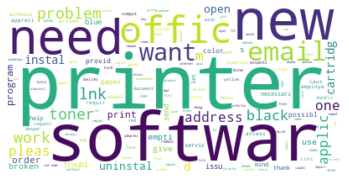

In [15]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
text1 = " ".join(a for a in df.tag)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6975 words in the combination of all review.


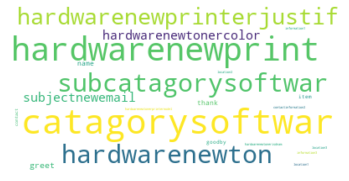

In [17]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
text3 = " ".join(a for a in df.responses)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6975 words in the combination of all review.


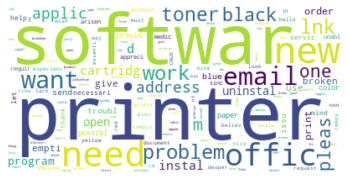

In [19]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text3)


plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### NER

In [20]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

C:\Users\DELL\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [21]:
f = open("Toner_updatedDis_Text.txt", "r", encoding="utf8")
print(f.read())

tag	patterns	responses
hardwarenewton	 my printer capabl print document 	 my printer capabl print document 
hardwarenewton	 my printer print paper 	 my printer print paper 
hardwarenewton	 i think lnk empti 	 i think lnk empti 
hardwarenewton	 i believ lnk empti 	 i believ lnk empti 
hardwarenewton	 the lnk appear empti 	 the lnk appear empti 
hardwarenewton	 i believ lnk unfil 	 i believ lnk unfil 
hardwarenewton	 my printer toner cartridg 	 my printer toner cartridg 
hardwarenewton	 my printer toner 	 my printer toner 
hardwarenewton	 my printer lnk 	 my printer lnk 
hardwarenewton	 my printer lack lnk 	 my printer lack lnk 
hardwarenewton	 my lnk empti 	 my lnk empti 
hardwarenewton	 my toner empti 	 my toner empti 
hardwarenewton	 i want order new lnk 	 i want order new lnk 
hardwarenewton	 i d want order new lnk 	 i d want order new lnk 
hardwarenewton	 i want order new toner 	 i want order new toner 
hardwarenewton	 i want order new black lnk 	 i want order new black lnk 
hardwar

In [22]:
file_name = 'Toner_updatedDis_Text.txt'
introduction_file_text = open(file_name, encoding="utf8").read()
introduction_file_doc = NER(introduction_file_text)
# Extract tokens for the given doc
aa = ([token.text for token in introduction_file_doc])


In [23]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [24]:
spacy.explain("GPE")


'Countries, cities, states'

In [25]:
text1= NER(introduction_file_doc)

In [26]:
for word in text1.ents:
    print(word.text,word.label_)

hardwarenewton GPE
hardwarenewton GPE
hardwarenewton GPE
hardwarenewton ORG
hardwarenewton ORG
hardwarenewton PERSON
replac ORG
replac ORG
hardwarenewton GPE
hardwarenewton GPE
hardwarenewton GPE
remov PERSON
remov PERSON
mobil ORG
mobil ORG
servic 
  PERSON
one CARDINAL
one CARDINAL
one CARDINAL
necessari PERSON
necessari 
  ORG


In [27]:
displacy.render(text1,style="ent",jupyter=True)

# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts


# CountVectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
#CV = vectorizer.fit_transform(df['tag'])
CV = vectorizer.fit_transform(df['patterns'])
CV = vectorizer.fit_transform(df['responses'])
CV.shape

(278, 166)

In [29]:
df_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
df_cv

,access,account,address,ahmad,alharthi,alkhathran,all,almutairi,alqahtani,alsufyani,...,want,way,we,wish,without,work,workplac,would,yellow,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CountVectorization Using (1, 2) Grams

In [30]:
CV_grams = CountVectorizer(ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df['patterns'])
CV_grams_ = CV_grams.fit_transform(df['responses'])
CV_grams_.shape

(278, 518)

In [31]:
df_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names())
df_grams

,access,access email,access internet,access softwar,account,address,address requir,address sent,ahmad,ahmad alharthi,...,would help,would like,would mind,would nice,would pleas,would possibl,would realli,yellow,yellow blue,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TfidfVectorizer Using (1, 2) Grams

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
CV_TF_IDF = TfidfVectorizer(ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['patterns'])
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['responses'])
CV_TF_IDF_.shape

(278, 518)

In [33]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

,access,access email,access internet,access softwar,account,address,address requir,address sent,ahmad,ahmad alharthi,...,would help,would like,would mind,would nice,would pleas,would possibl,would realli,yellow,yellow blue,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic modeling

Latent Semantic Analysis (LSA)

In [34]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(2)
CV= lsa.fit_transform(CV)
lsa.explained_variance_ratio_

array([0.10135646, 0.08330466])

In [35]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["cluster_1","cluster_2"],
             columns = vectorizer.get_feature_names())
topic_word

,access,account,address,ahmad,alharthi,alkhathran,all,almutairi,alqahtani,alsufyani,...,want,way,we,wish,without,work,workplac,would,yellow,you
cluster_1,0.001,0.0,0.037,0.0,0.0,0.0,0.002,0.0,0.0,-0.0,...,0.069,0.013,0.001,0.001,0.014,0.035,0.004,0.100,0.002,0.0
cluster_2,0.009,0.0,-0.006,0.0,0.0,0.0,0.001,0.0,0.0,-0.0,...,0.075,-0.003,0.022,0.024,-0.003,0.174,-0.001,-0.015,0.002,0.0


In [36]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [37]:
display_topics(lsa, vectorizer.get_feature_names(),50)


Topic  0
printer, new, offic, need, one, pleas, my, would, in, get, want, toner, softwar, the, like, provid, email, print, cartridg, it, broken, address, order, work, is, could, possibl, lnk, paper, there, appreci, let, me, applic, black, problem, sinc, give, can, requir, necessari, help, instal, without, uninstal, use, way, desper, empti, mine

Topic  1
softwar, problem, the, work, applic, instal, need, open, uninstal, me, there, want, program, use, troubl, issu, my, caus, give, arisen, not, unabl, can, remov, broken, do, wish, comput, have, we, piec, this, evalu, experienc, ca, nt, one, proper, time, unfortun, no, an, goal, run, servic, access, malfunct, black, print, blue


LSA and TfidfVectorize

In [38]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [39]:
display_topics(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=20)


Topic  0
printer, new, offic, new printer, printer offic, need, need new, pleas, would, get, get new, in, like, in offic, my, one, like new, printer need, offic printer, provid

Topic  1
softwar, problem, problem softwar, work, softwar work, the softwar, the, there problem, there, me, work me, applic, open, softwar applic, instal, troubl, issu, troubl softwar, my softwar, uninstal

Topic  2
work, softwar work, the, the softwar, me, work me, my, toner, want, black, lnk, my softwar, black lnk, toner cartridg, cartridg, my printer, use, applic, softwar use, need

Topic  3
black, lnk, want, black lnk, toner, want order, order new, want black, order, toner cartridg, cartridg, email, email address, address, black toner, problem softwar, problem, new email, like, new


# K-Means

In [59]:
from  sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 8)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_cv)
    kmeanModel.fit(df_cv)
 
    distortions.append(sum(np.min(cdist(df_cv, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_cv.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_cv, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_cv.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [60]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.7889079301887605
2 : 1.6748267262526932
3 : 1.6064302272020354
4 : 1.5599049802620704
5 : 1.5355743415443883
6 : 1.5045448835175945
7 : 1.4827130896980747


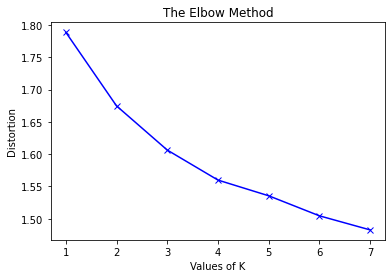

In [61]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [62]:
from  sklearn.cluster import KMeans

In [63]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

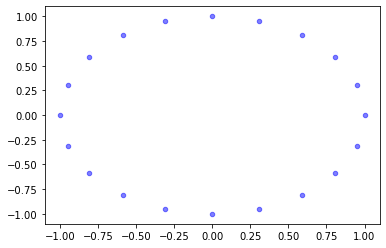

In [64]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

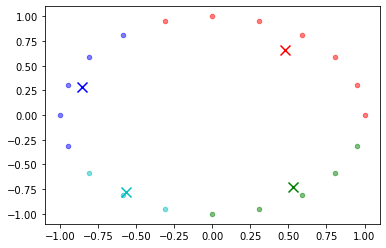

In [65]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

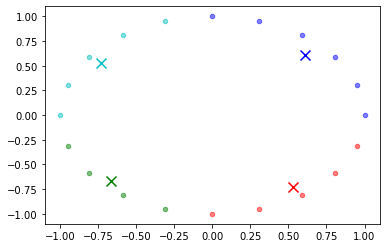

In [66]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

Determining optimium number of clusters

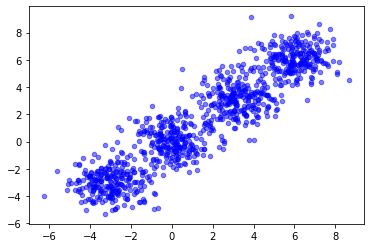

In [67]:
from sklearn.datasets import make_blobs
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

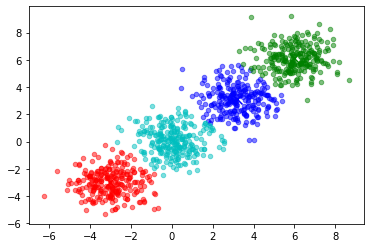

In [68]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)